<a href="https://colab.research.google.com/github/VilchisKarla/SIMULACION-I/blob/main/Aceptacion_Error_Triangular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aceptación y Error: Distribución Triangular**
*Vilchis García Karla Ivonne*


---

Pasos:
1. generar 2 números aleatorios *(R1 y R2)*
2. determinamos *x*
$$x=a+(b-a)R_1$$
3. evaluamos *x* en *f(x)*
4. si $\quad R_2 \leq \frac{f(x)}{M} \quad$ se acepta *x*

  en otro caso, rechazar *x*

In [12]:
#importamos las paqueterías necesarias
import random as rd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
#definimos los parámetros iniciales
a=1
b=3
c=5
M= 2 / (c-a)

In [14]:
#definimos nuestra función f(x)
def f(x):
  if a<=x<=b:
    return (2*(x-a)) / ((b-a)*(c-a))
  elif b<x<=c:
    return -(2*(x-c)) / ((c-b)*(c-a))

In [15]:
#hacemos la función que determinara la aceptación de los x
def acept_triang(n):
    l = [] #creamos la lista donde se almacenaran los x aceptados
    for i in range(n): #iniciamos el ciclo para generar los números aleatorios
        r1 = rd.random()
        r2 = rd.random()
        x = a+(c-a)*r1 #evaluamos el primer número aleatorio
        if r2 <= f(x)/M:#checamos la condición
           l.append(x)#si la cumple se agrega a la lista
    return l#regresa la lista de los x aceptados

In [16]:
#definimos una variable para el experimento
j  = acept_triang(50000)

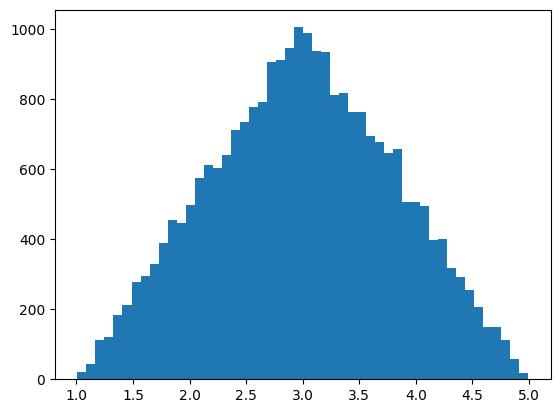

In [17]:
#graficamos
plt.hist(j,bins=50)
plt.show()

In [18]:
#calculamos la media, varianza y desviación estandar del experimento
print("media",np.mean(j))
print("varianza",np.var(j))
print("desviación estandar",np.std(j))
print("Números aceptados:",len(j))

media 3.0005877780787977
varianza 0.6573303374984513
desviación estandar 0.8107591118812364
Números aceptados: 25128


### **Resultados Teóricos**
para la media ocupamos
$$E[x]=\int_0^2f(x)xdx$$

para la varianza:
$$var[x]=E[x^2]-E[x]^2$$

In [19]:
#importamos sympy para la variable simbolica x
import sympy as sp
import math
x = sp.Symbol('x')

#calculamos la media con la formula de valor esperado  y nuestra integral
#queda en dos partes (int 1 de 1 a 3) e (int2 de 3 a 5)
y1 =(2*x*(x-a)) / ((b-a)*(c-a))
int1=sp.integrate(y1,(x,1,3))

y2 = (2*x*(x-c)) / ((c-a)*(b-c))
int2=sp.integrate(y2,(x,3,5))

E=int1+int2
print("media:", E)
#calculamos las integrales para poder calcular la varianza
y3 = (2*(x**2)*(x-a)) / ((b-a)*(c-a))
int3=sp.integrate(y3,(x,1,3))

y4 = (2*(x**2)*(x-c)) / ((c-a)*(b-c))
int4=sp.integrate(y4,(x,3,5))

v = int3+int4
var = v-E**2
print("varianza:", var)

ds = math.sqrt(var)
print("desviación estandar:", ds)

media: 3
varianza: 2/3
desviación estandar: 0.816496580927726
